# Lab 6

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy
from scipy import stats
import pickle

infile = open ("higgs_100000_pt_250_500.pkl",'rb')
higgs = pickle.load(infile)

infile = open ("qcd_100000_pt_250_500.pkl", 'rb')
qcd = pickle.load(infile)

## Problem 1

Text(0, 0.5, 'Count')

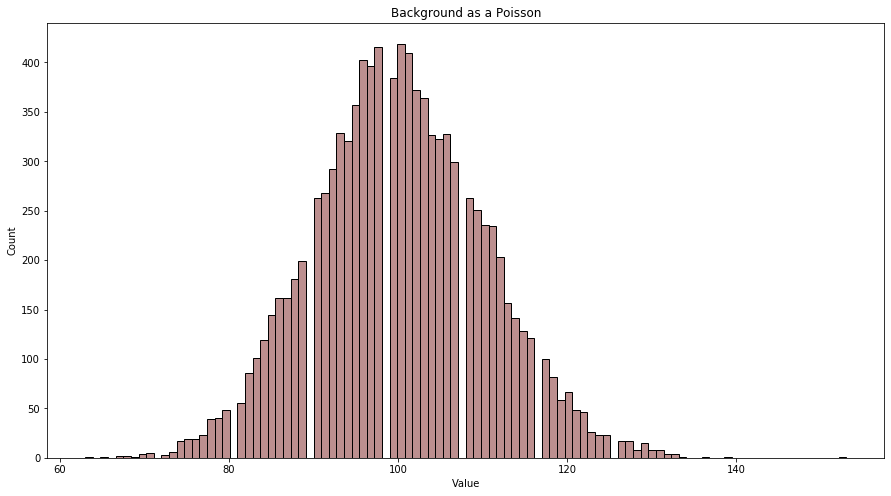

In [2]:
plt.figure(figsize=(15,8))

background = stats.poisson.rvs(100, size=10000)

plt.hist(background, bins=100, histtype='bar', ec='black',
         align='mid', color='rosybrown')

plt.title('Background as a Poisson')
plt.xlabel('Value')
plt.ylabel('Count')

In [3]:
#5 sigma threshold

std_dev = background.std()
five_sigma = 5 * std_dev + 100
print(five_sigma)

150.66770979627952


## Problem 2

### Part A

Here we will be injecting signals of a single strength, 500 times into our background. The signal strength will be a value of 10$\sigma$.

In [4]:
signal = 10 * std_dev + 100
print('Signal is', signal)
bg_and_sig = background
for i in range(500):
    bg_and_sig[i] = bg_and_sig[i] + signal

Signal is 201.33541959255905


Text(0.5, 0, 'Observed Value')

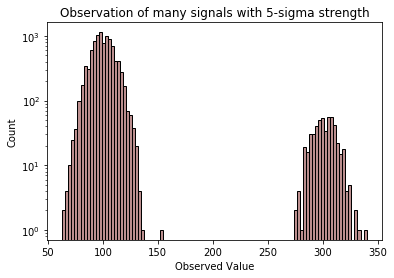

In [5]:
plot = plt.hist(bg_and_sig, bins=100, histtype='bar', ec='black',
         align='mid', color='rosybrown')
plt.title('Observation of many signals with 5-sigma strength')
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Observed Value')

The shape of the signal's histogram is similar to a Poisson distribution, which is also the shape of the background distribution. Also, the signal is shifted to the right by roughly the value of the signal from the background. The signal is plotted as a histogram that spans over a range of values. This tells us that observed signals also have its own distribution, where it can be valued for a range of numbers.

### Part B
The observed value will likely be stronger than the true injected signal. We injected a signal value of 201.45, however the mean of the observed signal is closer to 300. The observed signal is plotted similarly to a poisson distribution, so it is symmetrical as well.

## Problem 3

### Part a

Here we will be simulating the same thing we did in problem 2, but rather than adding one signal strength, we will add many different signal strengths.

In [6]:
high = 30 * std_dev
print(high)
signalstrength = np.linspace(0,400,10000)

scratch, signal_vals = np.meshgrid(signalstrength, signalstrength)

background = stats.poisson.rvs(100, size=10000)
obssignal = background + signalstrength

304.0062587776772


Text(0.5, 0, 'Observed Signal Value')

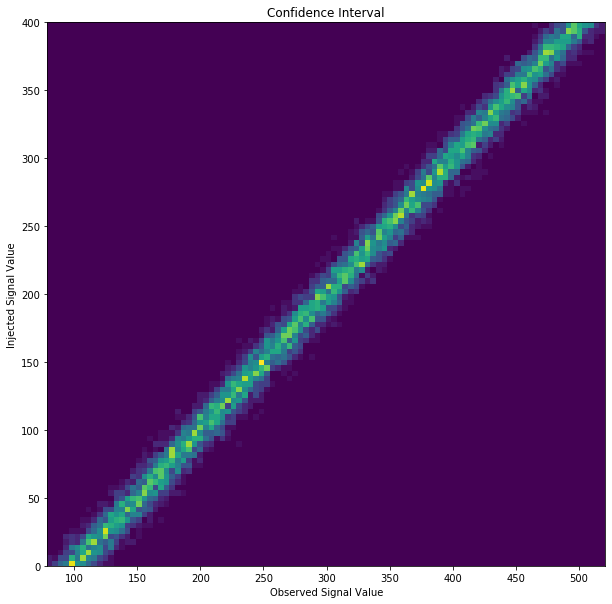

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
h = ax.hist2d(obssignal, signalstrength, bins=100);
plt.title('Confidence Interval')
plt.ylabel('Injected Signal Value')
plt.xlabel('Observed Signal Value')

### Part B

In [8]:
#close to 5-sigma value from problem 2
index = 5021
sig = signalstrength[index]

Text(0.5, 0, 'Observed Value')

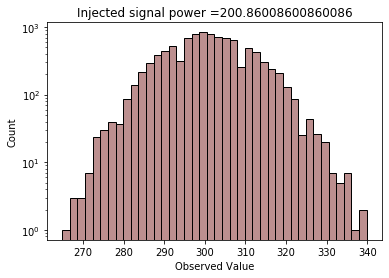

In [25]:
plt.hist(signalstrength[index] + background, 40, histtype='bar', ec='black',
         align='mid', color='rosybrown')
plt.title('Injected signal power =' + str(sig))
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Observed Value')

### Part C

Text(0.5, 0, 'Injected Signal Strength')

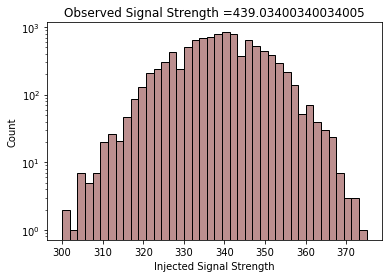

In [27]:
sig2 = obssignal[8500]

plt.hist(sig2 - background, 40, histtype='bar', ec='black',
         align='mid', color='rosybrown')
plt.title('Observed Signal Strength =' + str(sig2))
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Injected Signal Strength')

The histogram above tells us that with an observed signal strength of 439.03, the injected signal strength ranges between 300 to roughly 375. The shape of this histogram looks very similar to the histogram when plotting the observed signal.

### Part D


## Problem 4

### Part A

Text(0.5, 0, 'Injected Signal Strength')

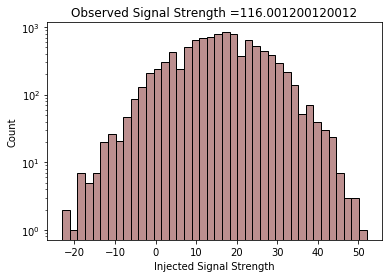

In [30]:
sig3 = obssignal[300]

plt.hist(sig3 - background, 40, histtype='bar', ec='black',
         align='mid', color='rosybrown')
plt.title('Observed Signal Strength =' + str(sig3))
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Injected Signal Strength')